<a href="https://colab.research.google.com/github/RyanXHF/ml_finished_projects/blob/main/ml_costume_churn_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Pré-processamento


## 1.1 - Importando os dados

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/RyanXHF/ml_finished_projects/main/Customer-Churn.csv'  # Use raw content URL
db = pd.read_csv(url)

In [3]:
db.shape

(7043, 18)

In [4]:
db.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.2 - Diferentes Variáveis

In [5]:
for col in db.columns:
  print(col, db[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [6]:
# modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao': 0}

db_binary = db[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)

db_binary.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
# Tratando colunas de classes multiplas
# Tranformação pelo get_dummies

db_no_binary = db.drop(columns=['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1)
db_no_binary.head()

,Maior65Anos,MesesDeContrato,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,FormaDePagamento,ContaMensal
0,0,1,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,ChequeDigital,29.85
1,0,34,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,ChequePapel,56.95
2,0,2,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,ChequePapel,53.85
3,0,45,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,DebitoEmConta,42.30
4,0,2,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,ChequeDigital,70.70


In [8]:
# convertendo dados de classes multiplas
db_dummie = pd.get_dummies(db_no_binary, dtype=int)
db_dummie.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [9]:
db_dummie.shape

(7043, 34)

In [10]:
db_final = pd.concat([db_binary, db_dummie], axis=1)
db_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [11]:
#DICA
pd.set_option('display.max_columns', 39)

In [12]:
db_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0



$y_i$ = $f(x_i)$

In [13]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [14]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 Balanceamento dos dados

In [15]:
db_final['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

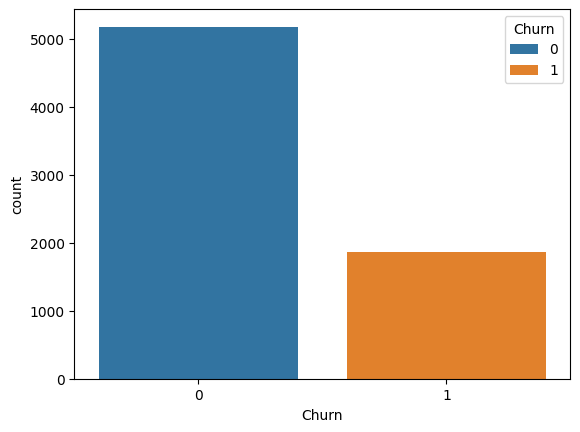

In [16]:
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x = 'Churn', hue = "Churn", data = db_final)

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [17]:
# Biblioteca para balancear os dados utilizando over sampling
from imblearn.over_sampling import SMOTE

In [18]:
X = db_final.drop('Churn', axis=1)
y = db_final['Churn']

In [19]:
seed = 123
smt = SMOTE(random_state=seed)
X, y = smt.fit_resample(X, y)

In [20]:
# Junção dados balanceados
db_final = pd.concat([X, y], axis=1)
db_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


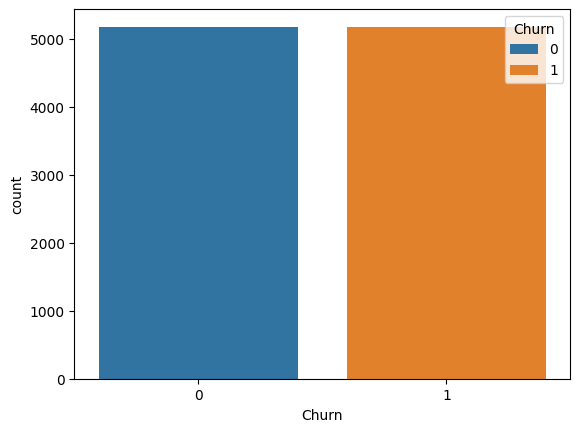

In [21]:
ax = sns.countplot(x = 'Churn', hue = "Churn", data = db_final)

# 2 - Suport Vector Classifier (SVC)

In [22]:
# Importando biblioteca
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# features e classe
X = db_final.drop('Churn', axis=1)
y = db_final['Churn']

# normalizar dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# separar treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.25, random_state=seed, stratify = y)

# instanciar o modelo
svc = SVC(gamma='auto', random_state=seed)

# treino do modelo
svc.fit(x_treino, y_treino)

# teste do modelo
previsoes_svc = svc.predict(x_teste)

# uso do modelo
Xmaria_normalizado = norm.transform(Xmaria)
y_maria = svc.predict(Xmaria_normalizado)
print('Y maria: ', y_maria[0])

Y maria:  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 3 - Modelo K-nearest neighbors (KNN) - método baseado na proximidade


## 3.1 - Implementando modelo

In [23]:
# Importando biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# features e classe
X = db_final.drop('Churn', axis=1)
y = db_final['Churn']

# normalizar dados
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# separar treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.25, random_state=seed, stratify = y)

# instanciar o modelo
knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors=3)

# treino do modelo
knn.fit(x_treino, y_treino)

# teste do modelo
previsoes_knn = knn.predict(x_teste)

# uso do modelo
Xmaria_normalizado = norm.transform(Xmaria)
y_maria = knn.predict(Xmaria_normalizado)
print('Y maria: ', y_maria[0])

Y maria:  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 3.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

# 4 Método probabilístico

## 4.1 - Teorema de Naive Bayes



$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

In [24]:
# Importando biblioteca
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# features e classe
X = db_final.drop('Churn', axis=1)
y = db_final['Churn']

# # normalizar dados
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X)

# separar treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=seed, stratify = y)

# instanciar o modelo
mnb = MultinomialNB()

# treino do modelo
mnb.fit(x_treino, y_treino)

# teste do modelo
previsoes_mnb = mnb.predict(x_teste)

# # uso do modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# y_maria = mnb.predict(Xmaria_normalizado)
y_maria = mnb.predict(Xmaria)
print('Y maria: ', y_maria[0])

Y maria:  1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## 4.2 - Modelo Bernoulli Naive Bayes



$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

# 5 - Método Simbólico

## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


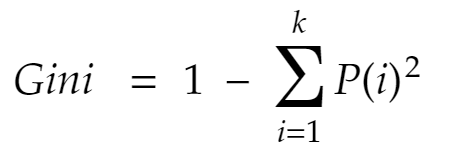

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

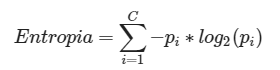


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


In [25]:
from sklearn.tree import DecisionTreeClassifier

# features e classe
X = db_final.drop('Churn', axis=1)
y = db_final['Churn']

# normalizar dados
# norm = StandardScaler()
# X_normalizado = norm.fit_transform(X)

# separar treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=seed, stratify = y)

dtc = DecisionTreeClassifier(max_depth=3, random_state=seed) # Cria o modelo
dtc.fit(x_treino, y_treino) # treino

# teste do modelo
previsoes_dtc = dtc.predict(x_teste)

# # uso do modelo
# Xmaria_normalizado = norm.transform(Xmaria)
# y_maria = mnb.predict(Xmaria_normalizado)
y_maria = mnb.predict(Xmaria)
print('Y maria: ', y_maria[0])

Y maria:  1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# 6 - Validação dos modelos

## 6.1 - Matriz de confusão



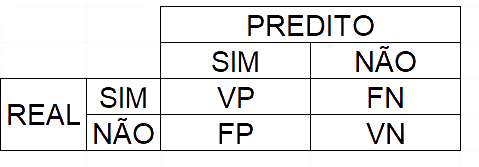

Matrix de confusão modelo SVC: 



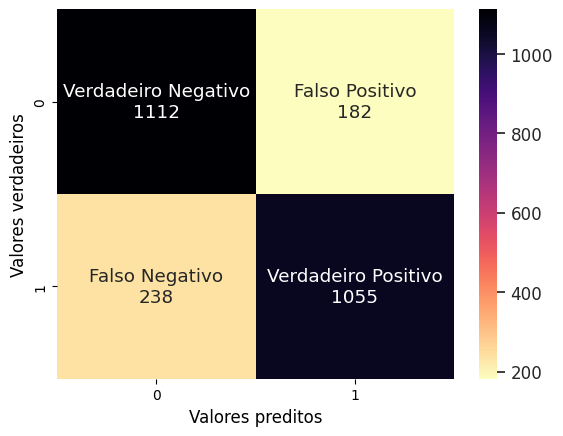

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

mc_svc = confusion_matrix(y_teste, previsoes_svc)
print('Matrix de confusão modelo SVC: \n')
gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

Matrix de confusão modelo KNN: 



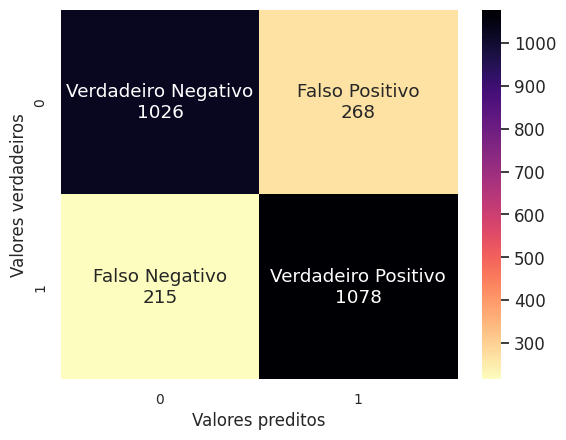

In [27]:
mc_knn = confusion_matrix(y_teste, previsoes_knn)
print('Matrix de confusão modelo KNN: \n')
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

Matrix de confusão modelo MNB: 



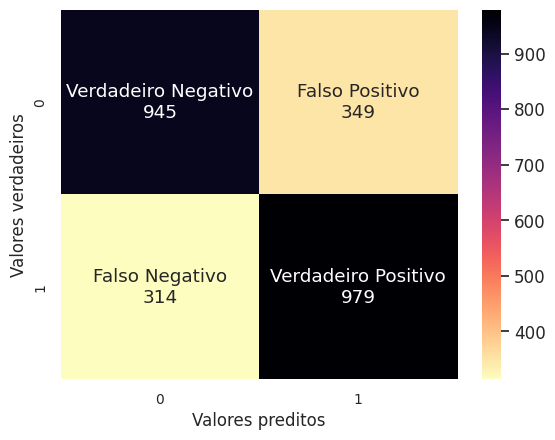

In [28]:
mc_mnb = confusion_matrix(y_teste, previsoes_mnb)
print('Matrix de confusão modelo MNB: \n')
gerando_matriz(mc_mnb, labels, categorias, cmap="magma_r")

Matrix de confusão modelo DTC: 



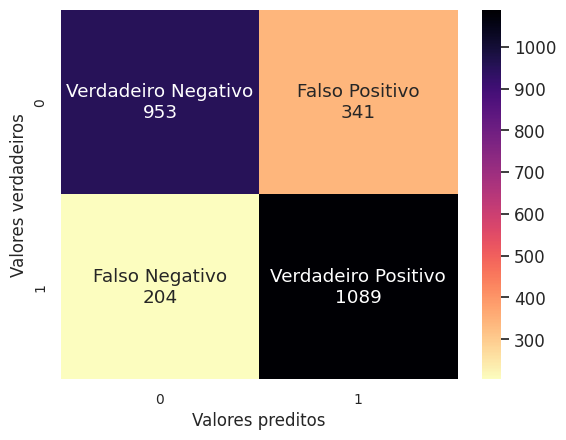

In [29]:
mc_dtc = confusion_matrix(y_teste, previsoes_dtc)
print('Matrix de confusão modelo DTC: \n')
gerando_matriz(mc_dtc, labels, categorias, cmap="magma_r")

## 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [30]:
from sklearn.metrics import accuracy_score

accuracy_svc = accuracy_score(y_teste, previsoes_svc)
accuracy_knn = accuracy_score(y_teste, previsoes_knn)
accuracy_mnb = accuracy_score(y_teste, previsoes_mnb)
accuracy_dtc = accuracy_score(y_teste, previsoes_dtc)

print('Acurácia do modelo SVC: ', accuracy_svc)
print('Acurácia do modelo KNN: ', accuracy_knn)
print('Acurácia do modelo MNB: ', accuracy_mnb)
print('Acurácia do modelo DTC: ', accuracy_dtc)

Acurácia do modelo SVC:  0.8376497873985311
Acurácia do modelo KNN:  0.8132972555083108
Acurácia do modelo MNB:  0.7437185929648241
Acurácia do modelo DTC:  0.7893312717433321


## 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [32]:
from sklearn.metrics import precision_score

precision_svc = precision_score(y_teste, previsoes_svc)
precision_knn = precision_score(y_teste, previsoes_knn)
precision_mnb = precision_score(y_teste, previsoes_mnb)
precision_dtc = precision_score(y_teste, previsoes_dtc)

print('Precisão do modelo SVC: ', precision_svc)
print('Precisão do modelo KNN: ', precision_knn)
print('Precisão do modelo MNB: ', precision_mnb)
print('Precisão do modelo DTC: ', precision_dtc)

Precisão do modelo SVC:  0.8528698464025869
Precisão do modelo KNN:  0.8008915304606241
Precisão do modelo MNB:  0.7371987951807228
Precisão do modelo DTC:  0.7615384615384615


## 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [35]:
from sklearn.metrics import recall_score

recall_svc = recall_score(y_teste, previsoes_svc)
recall_knn = recall_score(y_teste, previsoes_knn)
recall_mnb = recall_score(y_teste, previsoes_mnb)
recall_dtc = recall_score(y_teste, previsoes_dtc)

print('Recall do modelo SVC: ', recall_svc)
print('Recall do modelo KNN: ', recall_knn)
print('Recall do modelo MNB: ', recall_mnb)
print('Recall do modelo DTC: ', recall_dtc)

Recall do modelo SVC:  0.8159319412219644
Recall do modelo KNN:  0.8337200309358082
Recall do modelo MNB:  0.757153905645785
Recall do modelo DTC:  0.8422273781902552


## 6.5 - Escolhendo o melhor modelo


In [37]:
print('O modelo escolhido foi O Modelo SVC')

O modelo escolhido foi O Modelo SVC
